## Data Processing

In [42]:
import warnings
warnings.filterwarnings("ignore")

import random
import numpy as np #calculo matricial y operaciones aritméticas 
import matplotlib.pyplot as plt
import pandas as pd #gestionar set de datos de una manera estructurada
from sklearn.impute import SimpleImputer #puedes llamar solo la funcion concreta de esa libreria que quieres aplicar
import missingno as mno 
from sklearn import linear_model


In [2]:
random.seed(0)

In [3]:
data = pd.read_csv('./Breast_Cancer_Data.csv')
data.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
perimeter_mean,122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,74.52,91.38,70.67,103.4,143.0,142.0,131.2,108.3,140.1,47.92
area_mean,1001.0,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9,...,403.5,600.4,386.0,716.9,1347.0,1479.0,1261.0,858.1,1265.0,181.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1112,0.04462,0.0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0.0
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,...,0.04105,0.04304,0.0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0.0


In [7]:
data.shape

(569, 33)

In [17]:
#pip install missingno

In [18]:
data_nans = data.copy()
for column_i in data.columns:
    num_missings = random.randint(0,int(len(data)/3))
    for j in range(num_missings):
        idx = random.randint(0,len(data))
        data_nans[column_i][idx] = np.nan

In [35]:
#mno.matrix(data,figsize = (20, 6))

In [23]:
#hace un enumerate (un conteo) de la cantidad de nan

for i, column in enumerate(data_nans.columns):
    nan_count = data_nans[column].isna().sum()
    if nan_count > 0:
        print(i, column, nan_count)

0 id 132
1 diagnosis 22
2 radius_mean 116
3 texture_mean 121
4 perimeter_mean 35
5 area_mean 28
6 smoothness_mean 79
7 compactness_mean 108
8 concavity_mean 39
9 concave points_mean 117
10 symmetry_mean 56
11 fractal_dimension_mean 38
12 radius_se 10
13 texture_se 152
14 perimeter_se 38
15 area_se 107
16 smoothness_se 120
17 compactness_se 161
18 concavity_se 99
19 concave points_se 153
20 symmetry_se 125
21 fractal_dimension_se 142
22 radius_worst 94
23 texture_worst 164
24 perimeter_worst 30
25 area_worst 95
26 smoothness_worst 110
27 compactness_worst 13
28 concavity_worst 45
29 concave points_worst 52
30 symmetry_worst 29
31 fractal_dimension_worst 143
32 Unnamed: 32 569


In [26]:
# importing an array of features
x = data.iloc[:,2:].values 
# importing an array of dependent variable
y = data.iloc[:,0].values

In [27]:
data_nans.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302.0,M,NaN,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.1471,...,NaN,184.60,2019.0,0.1622,0.6656,NaN,0.2654,0.4601,0.11890,NaN
1,NaN,M,20.57,17.77,132.90,1326.0,0.08474,NaN,0.0869,NaN,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903.0,M,19.69,21.25,130.00,1203.0,NaN,0.1599,0.1974,0.1279,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,NaN,NaN
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,NaN,...,NaN,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402.0,M,NaN,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.1043,...,16.67,152.20,1575.0,NaN,0.2050,NaN,NaN,0.2364,0.07678,NaN


In [ ]:
#sustituimos nuestros valores faltantes, en un mundo ideal se deberian eliminar todas las columnas 
#que tuviesen valores faltantes
#si la cantidad de valores faltantes es mayor al 30% de los datos, eliminamos esa columna


In [36]:
# Remove column if amount of nan data >= 30%
for i, column in enumerate(data_nans.columns):
    nan_count = data_nans[column].isna().sum()
    if nan_count >= len(data_nans)*0.3:
        print("Column removed: ", column)
        del data_nans[column]

Column removed:  Unnamed: 32


In [40]:
import missingno as msno

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

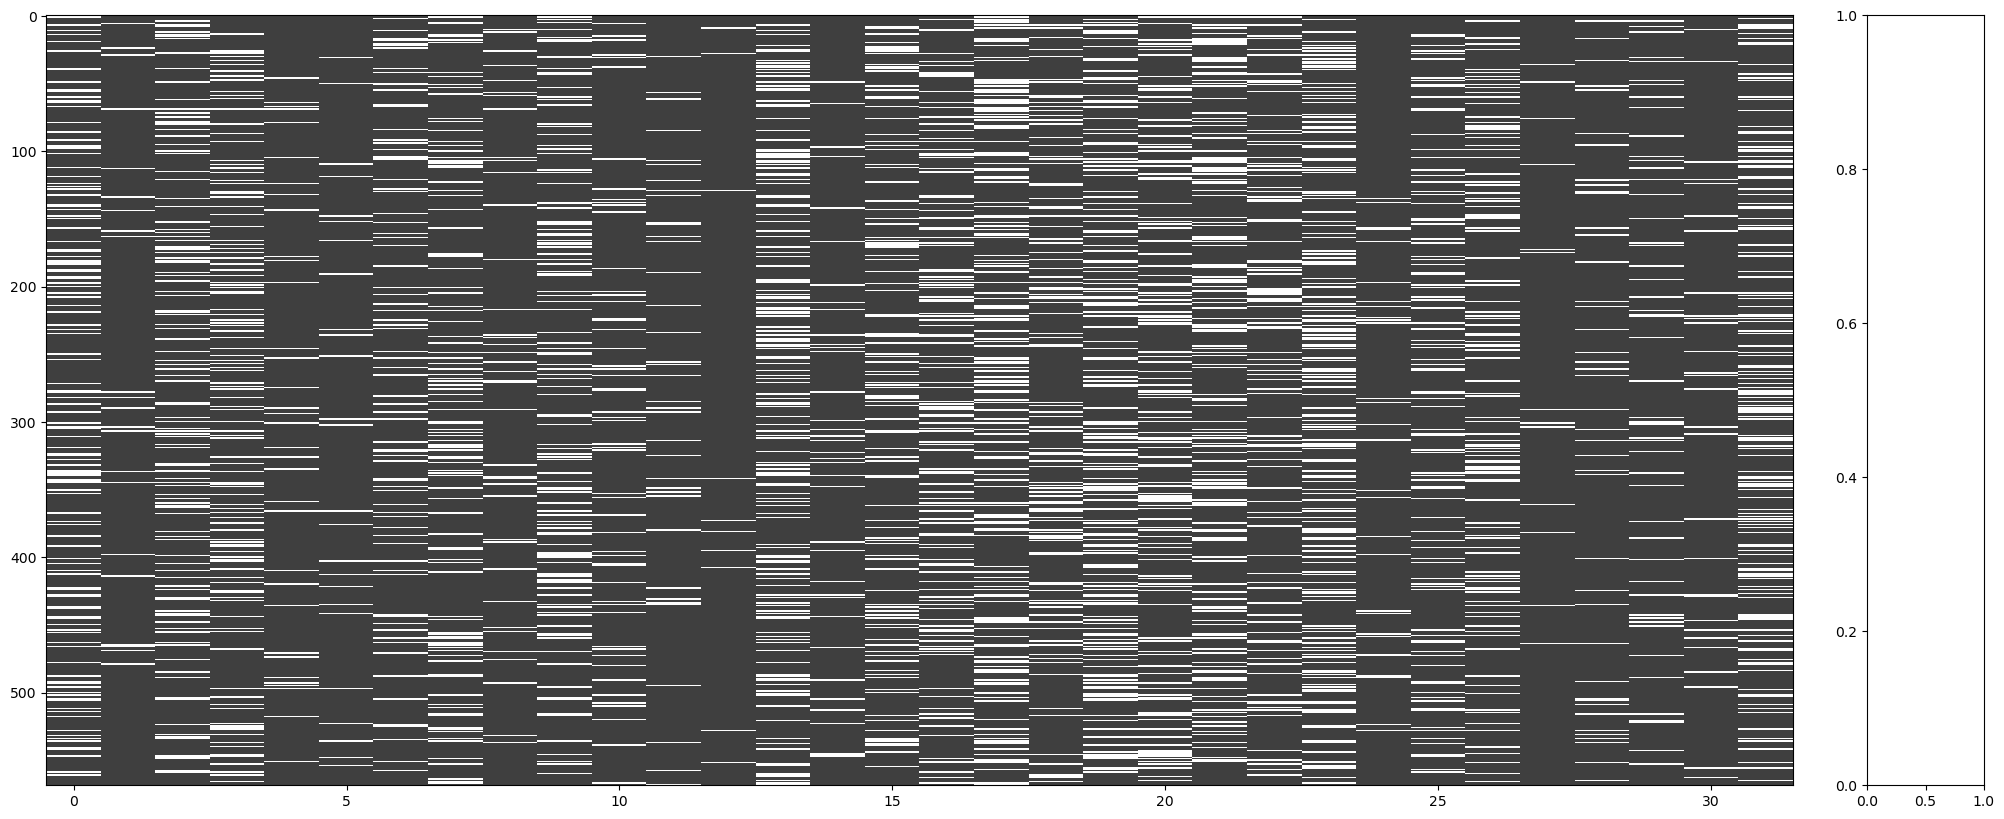

In [43]:
msno.matrix(data_nans)

In [37]:
data_imput = data_nans.copy()
del data_imput["diagnosis"]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

miss_mean_imputer = imputer.fit(data_imput)

imputed_df = miss_mean_imputer.transform(data_imput.values)

In [45]:
data_imput

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,NaN,184.60,2019.0,0.16220,0.66560,NaN,0.2654,0.4601,0.11890
1,NaN,20.57,17.77,132.90,1326.0,0.08474,NaN,0.08690,NaN,0.1812,...,NaN,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903.0,19.69,21.25,130.00,1203.0,NaN,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,NaN
3,84348301.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,NaN,0.2597,...,14.910,NaN,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402.0,NaN,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,NaN,0.20500,NaN,NaN,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424.0,21.56,22.39,142.00,1479.0,0.11100,NaN,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,NaN,0.1628,0.2572,NaN
566,926954.0,16.60,NaN,108.30,858.1,0.08455,NaN,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,NaN,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241.0,20.60,29.33,140.10,1265.0,0.11780,NaN,0.35140,0.15200,NaN,...,25.740,NaN,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [47]:
#un array de numpy

imputed_df.shape

(569, 31)

<Axes: >

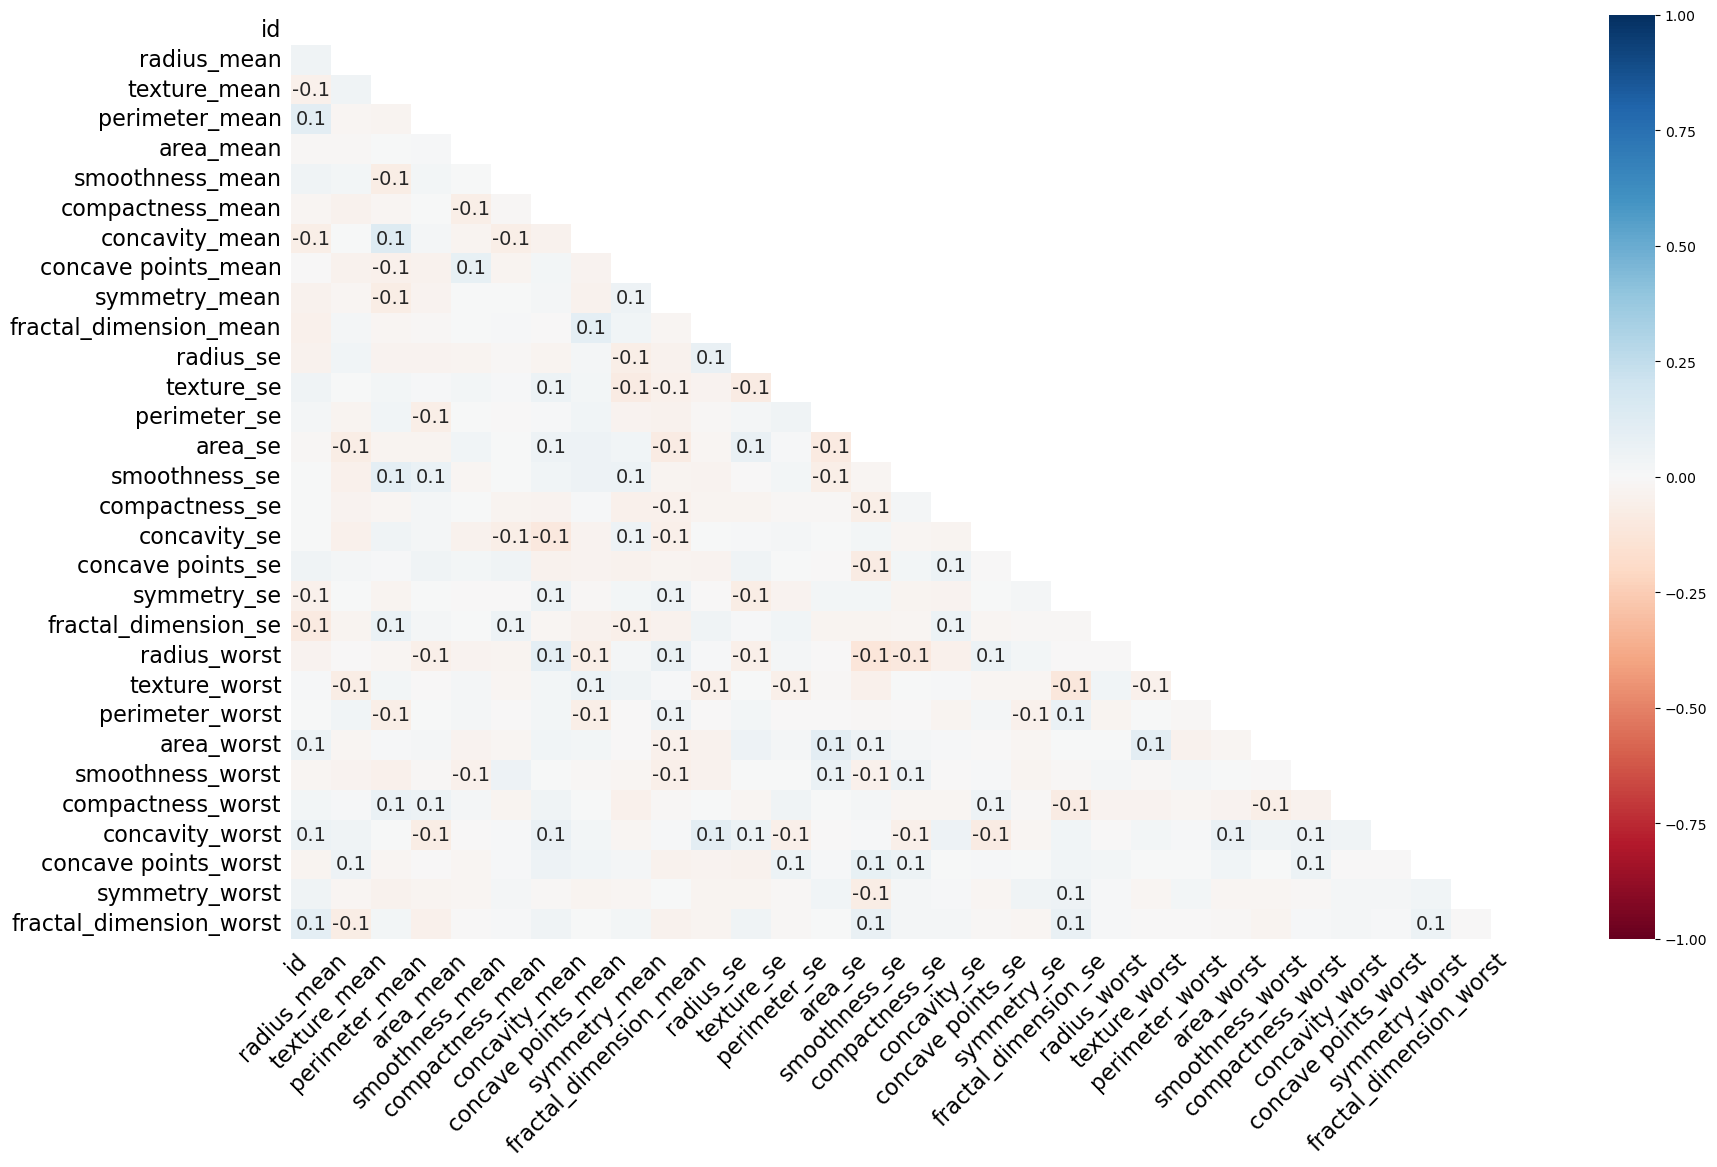

In [48]:
msno.heatmap(data_imput)

In [50]:
#msno.matrix(data_imput)

In [51]:
#no sale nada porque no tenemos nan
for i in range(0,569):
    for j in range(0,31):
        if imputed_df[i][j]==np.nan:
            print("there are nans")

# relleno aleatorio

este método te rellena el nan con un dato aleatorio, no afecta la distribución pero si a la media

In [59]:
#data_hd = data_nans.copy()
data_hd.fillna(method='ffill', inplace=True)

In [60]:
data_hd

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,M,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,NaN,184.60,2019.0,0.16220,0.66560,NaN,0.2654,0.4601,0.11890
1,842302.0,M,20.57,17.77,132.90,1326.0,0.08474,0.27760,0.08690,0.14710,...,25.380,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903.0,M,19.69,21.25,130.00,1203.0,0.08474,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08902
3,84348301.0,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.12790,...,14.910,25.53,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,11.42,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.20980,0.20500,0.6869,0.2575,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424.0,M,21.56,22.39,142.00,1479.0,0.11100,0.22360,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682.0,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.4107,0.1628,0.2572,0.07115
566,926954.0,M,16.60,28.25,108.30,858.1,0.08455,0.10340,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11660,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241.0,M,20.60,29.33,140.10,1265.0,0.11780,0.10340,0.35140,0.15200,...,25.740,34.12,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [61]:
for i, column in enumerate(data_hd.columns):
    nan_count = data_hd[column].isna().sum()
    if nan_count > 0:
        print(i, column, nan_count)

2 radius_mean 1
23 texture_worst 1
28 concavity_worst 1


In [62]:
from sklearn.impute import KNNImputer

data_hd = data_nans.copy()
imputer = KNNImputer(n_neighbors=2, weights="uniform")

data_hd['radius_mean'] = imputer.fit_transform(data_nans[['radius_mean']])

In [63]:
all_errors = [abs(data_hd['radius_mean'][i]-data['radius_mean'][i]) for i in range(len(data))]
print(np.mean(all_errors))
print(np.std(all_errors))
print(np.std(data['radius_mean']))

0.5081915990642348
1.2725497458444401
3.5209507607110626


# regresion 

cuando sepamos que nuestras variables se correlacionan con otras variales, entonces quitamos valores nulo

In [64]:
missing_columns = ["radius_mean", "texture_mean", "perimeter_mean"]
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])
data_nans_imp = data.copy()
del data_nans_imp["diagnosis"]
del data_nans_imp["Unnamed: 32"]
for col in missing_columns:
    data_nans_imp[col + '_imp'] = data_nans_imp[col]

In [65]:
### Deterministic regression
for feature in missing_columns:
    deter_data["Det" + feature] = data_nans_imp[feature + "_imp"]
    parameters = list(set(data_nans_imp.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = data_nans_imp[parameters], y = data_nans_imp[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[data_nans_imp[feature].isnull(), "Det" + feature] = model.predict(data_nans_imp[parameters])[data_nans_imp[feature].isnull()]

# regresion sthochastic

le añadimos algo de error  para añadir diversidad

In [66]:
missing_columns = ["radius_mean", "texture_mean", "perimeter_mean"]
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])
data_nans_imp = data.copy()
del data_nans_imp["diagnosis"]
del data_nans_imp["Unnamed: 32"]
for col in missing_columns:
    data_nans_imp[col + '_imp'] = data_nans_imp[col]

In [67]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])
for feature in missing_columns:
        
    random_data["Ran" + feature] = data_nans_imp[feature + '_imp']
    parameters = list(set(data_nans_imp.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = data_nans_imp[parameters], y = data_nans_imp[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(data_nans_imp[parameters])
    std_error = (predict[data_nans_imp[feature].notnull()] - data_nans_imp.loc[data_nans_imp[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = data_nans_imp[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(data_nans_imp[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(data_nans_imp[feature].isnull()) & 
                                                                            (random_predict > 0)]